<a href="https://colab.research.google.com/github/iamVedanta/A2_Alpha-Coders/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [41]:
#Create a modle class that inherits nn.Module
class Model(nn.Module):
#Input layer(4 features of the flower) -->Hidden Layer1 (number of neurons ) --> H2 (n)--> output (3 classes of iris flowers)
  def __init__(self,in_features=4, h1=8, h2=9, out_features=3): #input features are 4, number of neurons is 8 for hidden layer 1 and 9 for layer 2 , it has been put randomly
    super().__init__() #instantiate our nn.Module
    self.fc1  = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x)) #if the number is less than0 then the func considers as zero else its the number iteself
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [42]:
#Pick a manual seed for randomization
# https://sahilchachra.medium.com/paper-summary-torch-manual-seed-3407-is-all-you-need-9ef0f7aa7d78
# https://stackoverflow.com/questions/22639587/random-seed-what-does-it-do
torch.manual_seed(41)

In [43]:
#create an instance of the model
model =  Model()

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)


In [46]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [47]:
print(my_df['variety'].unique())

['Setosa' 'Versicolor' 'Virginica']


In [48]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [49]:
#change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [50]:
#Train Test Split | Set X,y
X = my_df.drop('variety',axis=1) #we want to drop the last column, axis=1->since it is a column

y = my_df['variety']


In [51]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: variety, dtype: float64

In [53]:
#convert these  to numpy arrays
X = X.values
y = y.values

In [54]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [55]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 41)

In [58]:
#Conert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test =  torch.FloatTensor(X_test)

In [59]:
#conver y labels to tensor long
y_train  = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [60]:
#Set the criterion of model to measure the error, i.e, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# https://pytorch.org/docs/stable/nn.html#loss-functions
#Choose an optimiser - Adams optimizer, set the lr(learning rate, if error doesnt go down after a bunch of iterations(epochs) we probably have to lower our learning rate )
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [61]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [62]:
#Train the model
#Epochs ?(one runt hru all the training data in our network)
epochs = 1000
losses = [] #we need to keep track of our errors or losses. Cuz we want to decrese the loss over time, that's wjem we know our model is learning
for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(X_train) #Get predicted results

  #Measure the loss/errors, gonna be high at first
  loss = criterion(y_pred, y_train) #predicted values v/s the y_train

  #Keep Track of our losses
  #losses.append(loss)
  losses.append(loss.detach().numpy()) #loss is a tensor, we use detach to convert it back to a numpy

  #print every 10 epoch
  if i%10==0:
    print(f"Epochs: {i} and loss is:{loss}")

  #Do some back propagation: take the erro rate of forward propogation and feeds it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epochs: 0 and loss is:1.125203251838684
Epochs: 10 and loss is:1.1094931364059448
Epochs: 20 and loss is:1.0956722497940063
Epochs: 30 and loss is:1.0833452939987183
Epochs: 40 and loss is:1.0711157321929932
Epochs: 50 and loss is:1.0581969022750854
Epochs: 60 and loss is:1.0440173149108887
Epochs: 70 and loss is:1.027978539466858
Epochs: 80 and loss is:1.0061289072036743
Epochs: 90 and loss is:0.9843640923500061
Epochs: 100 and loss is:0.9594907164573669
Epochs: 110 and loss is:0.931144118309021
Epochs: 120 and loss is:0.8988338708877563
Epochs: 130 and loss is:0.8627517223358154
Epochs: 140 and loss is:0.8233344554901123
Epochs: 150 and loss is:0.7822160720825195
Epochs: 160 and loss is:0.7426668405532837
Epochs: 170 and loss is:0.7056044936180115
Epochs: 180 and loss is:0.6711083650588989
Epochs: 190 and loss is:0.6388620734214783
Epochs: 200 and loss is:0.60847008228302
Epochs: 210 and loss is:0.5796231627464294
Epochs: 220 and loss is:0.5520011186599731
Epochs: 230 and loss is:0.5

Text(0.5, 0, 'Epoch')

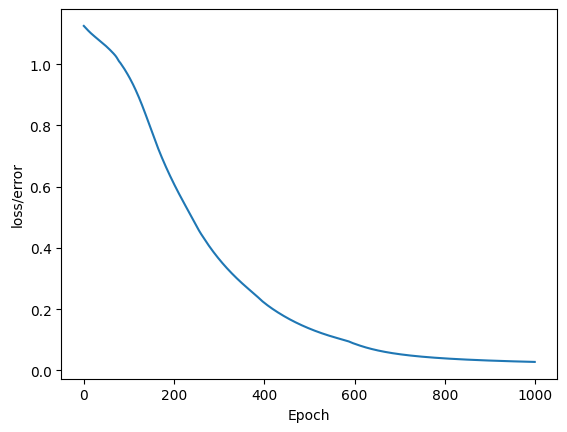

In [63]:
#Graph it out
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [64]:
#Evaluate MOdel on Test Data Set(validate model on test set)
with torch.no_grad():#Basically turn off back propagation
  y_eval =  model.forward(X_test) #X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval,  y_test)  #Creates a criterion that measures the
  # mean squared error (squared L2 norm) between each element in the input x and target y. This criterion computes the cross entropy loss between input logits and target.



In [65]:
loss

tensor(0.1359)

In [66]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)


    if y_test[i] == 0:
      x='Setosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x= 'Virginica'

    #Will tesll us what type of flower class our network thinks  it is
    print(f'{(i+1)}   {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #correct or not
    #y_val.argmax() will tell us the prediction
    if y_val.argmax().item() == y_test[i]:
      correct+=1

print(f'we got {correct} correct')

1   tensor([-4.2466,  3.4849,  6.3602]) 	 2 	 2
2   tensor([-5.9658,  2.1776, 10.6392]) 	 2 	 2
3   tensor([-6.8240,  3.0771, 11.3554]) 	 2 	 2
4   tensor([-2.1331,  5.8986,  0.6188]) 	 1 	 1
5   tensor([-5.5310,  3.3017,  8.8321]) 	 2 	 2
6   tensor([-0.8767,  6.3491, -1.5805]) 	 1 	 1
7   tensor([-4.1237,  4.1891,  5.5841]) 	 2 	 2
8   tensor([-2.0553,  5.9456,  0.4394]) 	 1 	 1
9   tensor([-4.8082,  3.7073,  7.2020]) 	 2 	 2
10   tensor([-6.3741,  2.2449, 11.3551]) 	 2 	 2
11   tensor([-3.8543,  4.1646,  5.1096]) 	 2 	 2
12   tensor([  9.4564,   2.1377, -11.2372]) 	 0 	 0
13   tensor([  8.7240,   1.9440, -10.3479]) 	 0 	 0
14   tensor([ 0.3479,  5.1915, -2.4599]) 	 1 	 1
15   tensor([ 7.8864,  2.7557, -9.7789]) 	 0 	 0
16   tensor([-3.5497,  4.5564,  4.2446]) 	 2 	 1
17   tensor([  8.6425,   2.1962, -10.3756]) 	 0 	 0
18   tensor([-4.1079,  3.6003,  6.0114]) 	 1 	 2
19   tensor([  9.9880,   1.7605, -11.6436]) 	 0 	 0
20   tensor([ 7.5740,  2.5441, -9.3587]) 	 0 	 0
21   tensor([-0.1

In [67]:
#Creating new iris datpoint and checking
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

with torch.no_grad():
  print(model(new_iris))

tensor([  9.2302,   1.9788, -10.9167])


In [68]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])

In [69]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-4.3517,  3.2769,  6.7071])


In [71]:
#Save our NN model
torch.save(model.state_dict(), 'my_iris_model.pt')

In [72]:
#Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [73]:
#Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)